In [2]:
import sys, os
import multiprocessing as mp
from joblib import Parallel, delayed

import numpy as np
import matplotlib.pyplot as plt

from benchmarks import power_sample
from hyppo.independence import CCA, Dcorr, HHG, Hsic, RV, MGC
from hyppo.sims import *

In [4]:
import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=1.5)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[1:], n_colors=9)


In [5]:
MAX_SAMPLE_SIZE = 100
STEP_SIZE = 5
SAMP_SIZES = range(5, MAX_SAMPLE_SIZE + STEP_SIZE, STEP_SIZE)
POWER_REPS = 5

In [6]:
simulations = [
    linear,
    multimodal_independence
]

tests = [
    RV,
]

In [7]:
def estimate_power(sim, test):
    est_power = np.array([np.mean([power_sample(test, sim, n=i, p=3) for _ in range(POWER_REPS)])
                          for i in SAMP_SIZES])
    np.savetxt('C:/Users/siptest/Desktop/NDD/{}_{}.csv'.format(sim.__name__, test.__name__),
               est_power, delimiter=',')
    
    return est_power

In [8]:
outputs = Parallel(n_jobs=-1, verbose=100)(
    [delayed(estimate_power)(sim, test) for sim in simulations for test in tests]
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.5min finished


In [11]:
def plot_power(): 
    fig, ax = plt.subplots(nrows = 1, ncols =2, figsize = (28, 24))
    
    sim_title = [
        "Linear", 
        "Independence"
    ]
    
    for i, col in enumerate(ax):
        sim = simulations[i]
        for test in tests:
                power = np.genfromtxt('C:/Users/siptest/Desktop/NDD/{}_{}.csv'.format(sim.__name__, test.__name__),
                                      delimiter=',')
        col.plot(SAMP_SIZES, power, label=test.__name__, lw=1)
        col.set_xticks([])
        col.set_yticks([-1, 0, 1])
        col.set_title(sim_title[i])
    fig.text(0.5, 0.08, 'Sample Size', ha='center')
    leg = plt.legend(bbox_to_anchor=(0.5, 0.08), bbox_transform=plt.gcf().transFigure,
                     ncol=5, loc='upper center')
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    plt.subplots_adjust(hspace=.50)
    plt.savefig('C:/Users/siptest/Desktop/NDD/Ind_samp_power_sampsize.pdf', transparent=True, bbox_inches='tight')

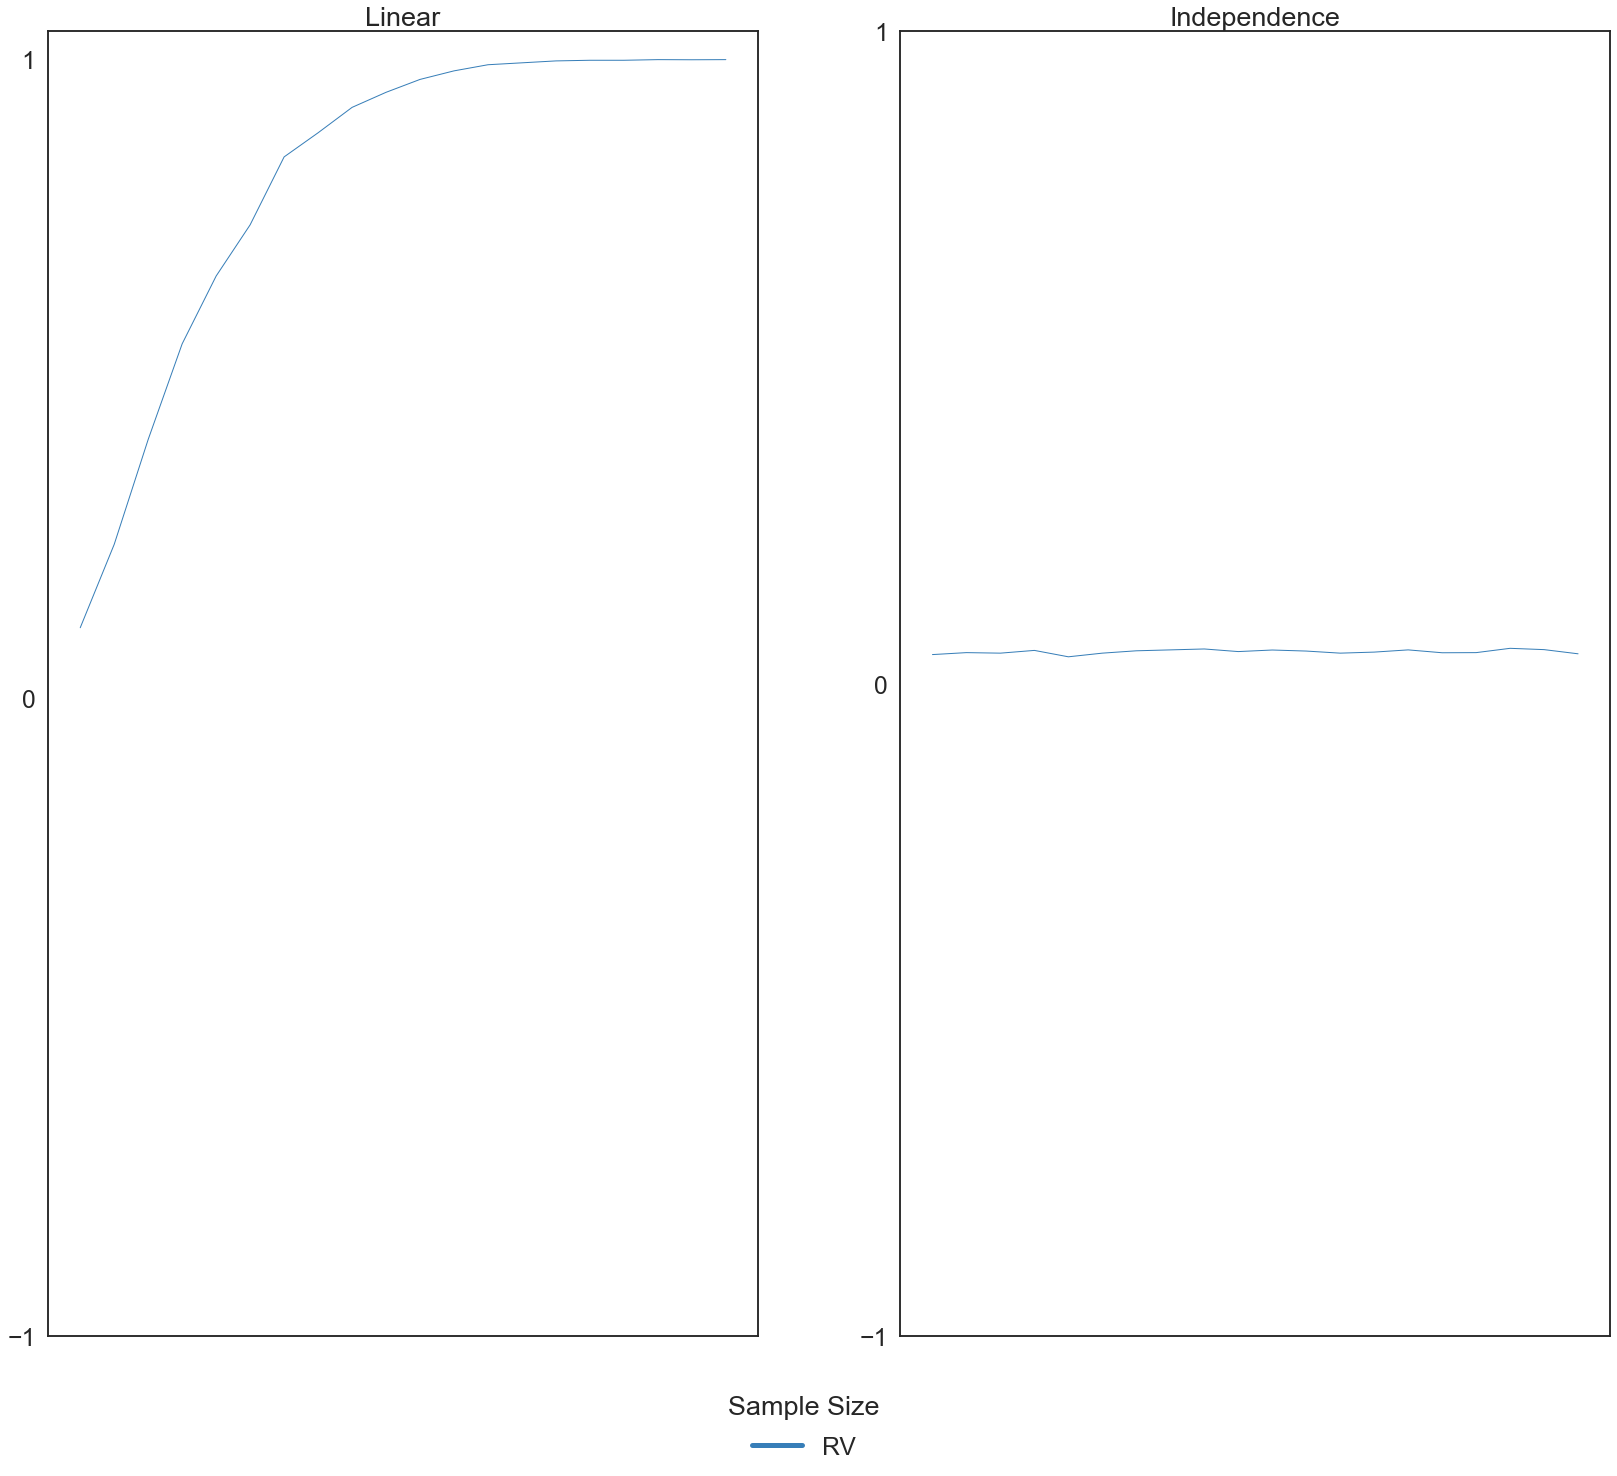

In [12]:
plot_power()